In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

## my own function that gets the data
from Pi_GetData_fcn import GetData as GetData
from Pi_GetPiOverview_fcn import GetPiOverview as GetPiOverview


In [53]:
# define function
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same')/w

## What you need:
* python functions:
  * **Pi_GetData_fcn.py**
  * **Pi_GetPiOverview_fcn.py**
  * data: 

Comment: This script also handles theta and D diversity measures the same way! In general we call the quantity **div**, as in diversity and it can be pi, theta or D

## What this script does:

- it loads diversity data with the **Pi_GetData_fcn.py** function 
  - in that function it:
      1. shifts the window position so that it applies to the whole genome and not chromosome position
      2. all samples are joined in one data frame
      3. there is df_shiftRaw with the raw data for fraction (%) of window covered and diversity (e.g. pi diversity) per window
      4. there is also df_shiftNorm in which for each window **div** is multiplied with frac
 - Then, calculate genome-wide **div** values either with the raw data or normalised data, with **Pi_GetPiOverview_fcn.py**
    1. **div**: uses the raw data, average ove all **div** values
    2. **div**Weight: using the df_shiftNorm data - it evaluates: 
$$\text{div}_{weight} = \frac{\sum_{i=1}^{n}\text{div}_{i}\cdot f_{i}}{\sum_{i=1}^{n}f_{i}}$$
      ( before, I had this, but I kicked it out: divNormwNaN: the final value is multiplied with the fraction of windows that are not nan)

![dataStructure](BioInfo.png)

In [54]:
# read in data to panda
InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_0.01/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/defaultSet_500Cov/fractioncov_default/"
files=glob.glob(InPath+"*.pi")

outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
chromosomes_end = [1.50750e+07, 3.03500e+07, 4.41350e+07, 6.16300e+07, 8.25550e+07, 1.00270e+08, 1.00285e+08]

len(files)

['/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/D_July24/defaultSet_500Cov/fractioncov_0.01/VU_bb_1_4_Sanger_maxCov500_fracCov_0.01.D',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/D_July24/defaultSet_500Cov/fractioncov_0.01/NIOO_A00_15_2_Sanger_maxCov500_fracCov_0.01.D',
 '/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/D_July24/defaultSet_500Cov/fractioncov_0.01/Gent_iso_15_3_Sanger_maxCov500_fracCov_0.01.D']

In [57]:
## use the function to get the data 
samName_collect, df_shiftRaw, df_shiftNorm, collect_sumofWeights, collect_NanNum = GetData(files, chromosomes, chromosomes_end,False)
overview = GetPiOverview(samName_collect, df_shiftRaw, df_shiftNorm, collect_sumofWeights, collect_NanNum)

overview["NumNaNWindows"] =  collect_NanNum

#overview
df_shiftRaw
overview

,ID,institution,treatment,inst_treat,week,rep,div_mean,div_std,divWeight_mean,divWeight_std,NumNaNWindows
div_VU_bb_1_4,VU_bb_1_4,VU,bb,VU_bb,1,4,-0.685229,1.175462,-0.684240,1.173432,1.0
div_NIOO_A00_15_2,NIOO_A00_15_2,NIOO,A00,NIOO_A00,15,2,-0.546974,1.184851,-0.545707,1.182598,1.0
div_Gent_iso_15_3,Gent_iso_15_3,Gent,iso,Gent_iso,15,3,-0.310570,0.985412,-0.309444,0.983208,3.0
div_WUR_bleach_15_2,WUR_bleach_15_2,WUR,bleach,WUR_bleach,15,2,-0.464214,0.949391,-0.464029,0.947416,3.0
div_NIOO_M00_1_5,NIOO_M00_1_5,NIOO,M00,NIOO_M00,1,5,-0.081643,0.314615,-0.086560,0.283986,4.0
div_VU_bb_0_5,VU_bb_0_5,VU,bb,VU_bb,0,5,-0.872550,1.034748,-0.873611,1.033425,1.0
div_Gent_bb_1_3,Gent_bb_1_3,Gent,bb,Gent_bb,1,3,-0.863467,1.172133,-0.862555,1.170041,1.0
div_WUR_bb_1_3,WUR_bb_1_3,WUR,bb,WUR_bb,1,3,-0.722229,1.124397,-0.721596,1.122182,1.0
div_NIOO_M00_1_3,NIOO_M00_1_3,NIOO,M00,NIOO_M00,1,3,-0.062900,0.254535,-0.065785,0.213947,7.0
div_NIOO_M00_15_3,NIOO_M00_15_3,NIOO,M00,NIOO_M00,15,3,-0.816570,1.133806,-0.818886,1.129867,3.0


In [56]:

#the fields that we are interested in: 
samName_collect_frac = ["frac_"+s for s in samName_collect]
threshold = 0.6

df_shiftRaw_threshold = df_shiftRaw.copy()

print(df_shiftRaw_threshold.isna().sum().sum())


for i in range(len(samName_collect)):
    column = df_shiftRaw_threshold[samName_collect_frac[i]].values

    #print(np.sum(np.isnan(column)))
    column_new = np.where(column<= threshold, np.nan, column)
    #print(np.sum(np.isnan(column_new)))
    df_shiftRaw_threshold[samName_collect_frac[i]] = column_new


print(df_shiftRaw_threshold.isna().sum().sum())
df_shiftRaw_threshold

206
6580


,chr,window_old,window,frac_VU_bb_1_4,div_VU_bb_1_4,frac_NIOO_A00_15_2,div_NIOO_A00_15_2,frac_Gent_iso_15_3,div_Gent_iso_15_3,frac_WUR_bleach_15_2,div_WUR_bleach_15_2,frac_NIOO_M00_1_5,div_NIOO_M00_1_5,frac_VU_bb_0_5,div_VU_bb_0_5,frac_Gent_bb_1_3,div_Gent_bb_1_3,frac_WUR_bb_1_3,div_WUR_bb_1_3,frac_NIOO_M00_1_3,div_NIOO_M00_1_3,frac_NIOO_M00_15_3,div_NIOO_M00_15_3,frac_VU_bn5_15_2,div_VU_bn5_15_2,frac_NIOO_M00_15_1,div_NIOO_M00_15_1,frac_NIOO_M00_15_5,div_NIOO_M00_15_5,frac_NIOO_bb_1_3,div_NIOO_bb_1_3,frac_VU_bb_15_2,div_VU_bb_15_2,frac_VU_bn5_15_1,div_VU_bn5_15_1,frac_VU_bb_1_5,div_VU_bb_1_5,frac_Gent_iso_15_4,div_Gent_iso_15_4,frac_RUG_bb_1_2,div_RUG_bb_1_2,frac_VU_bn50_0_4,...,frac_NIOO_A00_15_5,div_NIOO_A00_15_5,frac_NIOO_M00_1_1,div_NIOO_M00_1_1,frac_NIOO_bb_15_4,div_NIOO_bb_15_4,frac_VU_bb_1_1,div_VU_bb_1_1,frac_VU_bb_15_4,div_VU_bb_15_4,frac_Gent_bb_1_1,div_Gent_bb_1_1,frac_RUG_bb_15_4,div_RUG_bb_15_4,frac_WUR_bb_15_3,div_WUR_bb_15_3,frac_VU_bb_0_4,div_VU_bb_0_4,frac_VU_bn5_0_3,div_VU_bn5_0_3,frac_VU_bn5_0_1,div_VU_bn5_0_1,frac_VU_bn5_0_2,div_VU_bn5_0_2,frac_NIOO_A00_1_4,div_NIOO_A00_1_4,frac_WUR_bb_1_1,div_WUR_bb_1_1,frac_WUR_bb_15_1,div_WUR_bb_15_1,frac_VU_bb_15_1,div_VU_bb_15_1,frac_VU_bn50_0_5,div_VU_bn50_0_5,frac_NIOO_A00_1_2,div_NIOO_A00_1_2,frac_UVA_anc_0_2,div_UVA_anc_0_2,frac_Gent_iso_15_1,div_Gent_iso_15_1,frac_VU_bb_1_2,div_VU_bb_1_2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NC_003279.85000,NC_003279.8,5000,5000.0,0.986,-1.159296,0.963,-1.323641,0.981,-0.513939,0.995,-0.866311,0.917,-0.722507,0.997,-1.137652,0.981,-1.056595,0.972,-1.268599,0.759,-0.328472,0.938,-0.769472,0.967,-0.997538,0.951,-0.735967,0.938,-0.825637,0.987,-1.099569,0.976,-0.606266,0.978,-0.603269,0.958,-1.240323,0.977,-0.558013,0.989,-1.376397,0.998,...,0.978,-1.040436,0.932,-0.529981,0.989,-1.264573,0.991,-1.030772,0.977,-0.851565,0.972,-0.878097,0.976,-1.294136,0.983,-1.218671,0.987,-1.303005,0.963,-0.848569,0.999,-0.827923,0.963,-1.353546,0.981,-0.679196,0.976,-1.254906,0.976,-0.575185,0.987,-1.224011,0.976,-0.715681,0.976,-1.327755,0.996,-0.946792,0.964,-1.020415,0.973,-1.393037
NC_003279.815000,NC_003279.8,15000,15000.0,0.999,-1.152149,1.000,-1.716023,0.997,-0.745610,0.998,-0.005000,0.675,-0.314430,0.997,-0.878180,1.000,-0.937004,0.999,-0.402073,NaN,-0.083924,0.996,-1.703278,0.999,-1.307512,0.995,-1.598129,0.998,-2.502227,0.998,-0.238998,0.995,0.062901,0.995,0.077118,1.000,-1.044849,0.997,-0.100745,1.000,-1.203434,0.999,...,0.984,-0.591086,0.925,-0.127008,0.998,-1.241756,1.000,-0.769039,0.996,-0.809682,1.000,-1.214494,0.998,-0.495855,0.999,-0.645265,0.998,-1.352344,1.000,-0.922554,0.999,-0.122833,0.997,-1.155864,0.944,-0.832295,0.999,-1.070933,0.997,0.823821,0.999,-1.399698,0.996,0.202589,0.991,-1.053474,0.999,-1.037927,0.999,-1.231571,1.000,-1.057709
NC_003279.825000,NC_003279.8,25000,25000.0,1.000,-0.929561,0.994,-2.024085,0.996,-0.454572,0.996,-0.293212,0.759,-0.167860,0.998,-0.716263,1.000,-0.863813,0.995,-0.734223,0.603,0.621070,0.994,-2.236736,0.995,-1.341111,0.993,-2.325028,0.994,-2.596632,0.994,-0.851772,0.993,-0.360232,0.993,-0.432862,0.995,-1.520019,0.994,-0.095111,0.995,-1.124575,1.000,...,0.991,-0.731705,0.980,0.100910,0.999,-1.261996,0.995,-0.650232,0.994,-1.187878,1.000,-1.564969,0.995,-0.802757,0.994,-0.923225,0.999,-1.614252,0.995,-1.202904,0.995,-0.802265,0.994,-1.786751,0.975,-0.616925,1.000,-1.217957,0.993,0.945702,0.994,-1.446944,0.994,0.159434,0.993,-1.222710,1.000,-1.331385,0.995,-1.516304,0.995,-1.243453
NC_003279.835000,NC_003279.8,35000,35000.0,0.998,-1.256924,0.997,-1.989783,0.997,-1.106517,0.996,-0.621591,0.848,-0.682176,0.997,-1.349732,0.997,-1.115097,0.998,-0.725252,0.788,-0.069419,0.993,-2.078000,0.996,-1.797318,0.993,-1.944440,0.994,-2.421340,0.997,-0.601723,0.994,0.638550,0.994,-0.891740,0.997,-1.528690,0.995,0.093790,0.999,-1.473258,0.997,...,0.992,-0.512525,0.945,0.190295,0.997,-1.622414,0.998,-0.432567,0.995,-1.556616,0.998,-2.016668,0.997,-0.558670,0.996,

<Axes: xlabel='NumNaNWindows', ylabel='div_mean'>

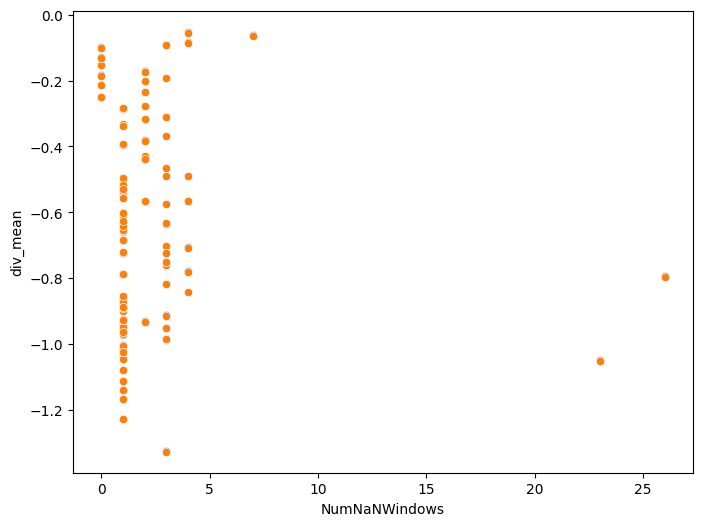

In [60]:
# what is the impact of the number of windows that we have to ignore?

fig2, ax2 = plt.subplots(figsize=(8,6))
sns.scatterplot(overview, x="NumNaNWindows",y="div_mean", ax=ax2)
sns.scatterplot(overview, x="NumNaNWindows",y="divWeight_mean", ax=ax2)



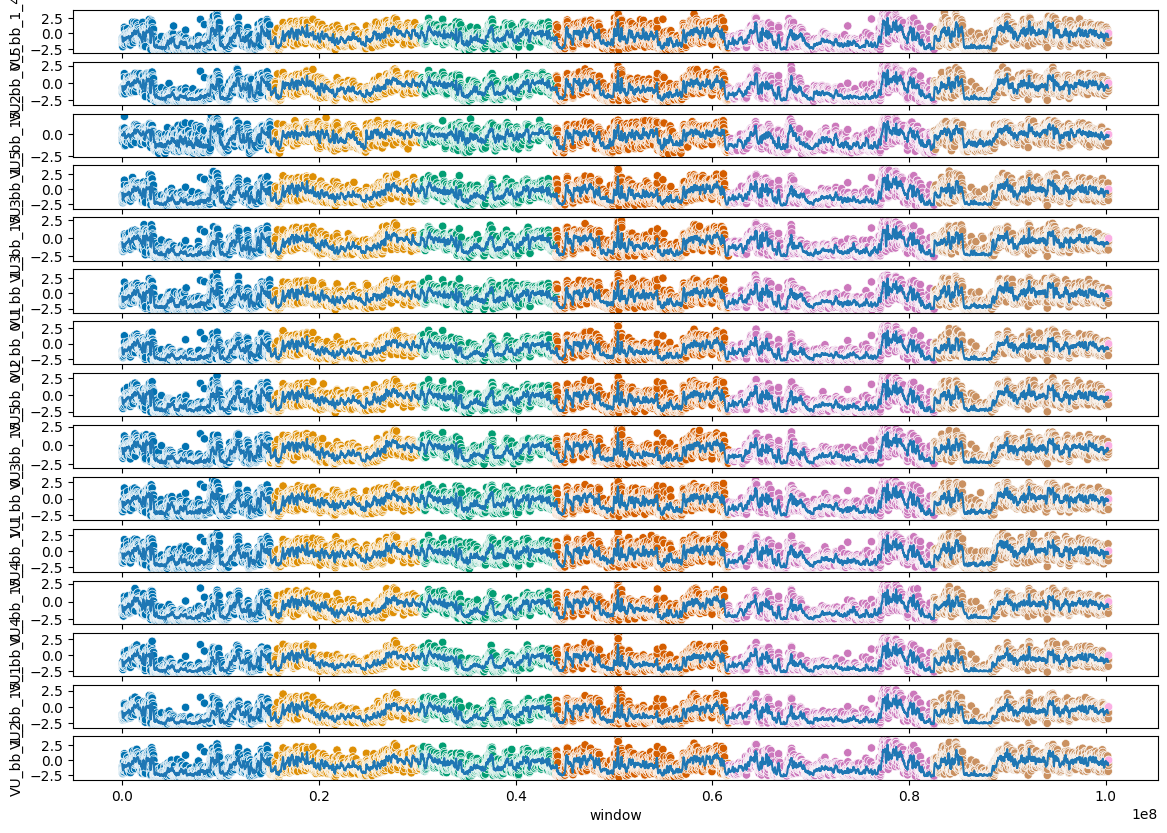

In [61]:
## this is just here for check reasons:
### -- to see if we have data for the whole genome

samName_plot = [s for s in samName_collect if "VU_bb" in s]

f1, axx = plt.subplots(len(samName_plot),1, sharex='col', figsize=(14, 10))#, sharex=True)
windowSize=10

for i in range(len(samName_plot)):
    plot = sns.scatterplot(ax=axx[i], data=df_shiftNorm, x='window', y="divNorm"+"_"+samName_plot[i], 
                   hue='chr', palette = 'colorblind', legend=None) 
    axx[i].set_ylabel(samName_plot[i])
    movmean = moving_average(df_shiftNorm["divNorm"+"_"+samName_plot[i]], windowSize)
    axx[i].plot(np.array(df_shiftNorm['window'].values),movmean)


In [62]:
# only look at backbone
overviewBB = overview.loc[(overview['treatment']=="bb") | (overview['treatment']=="anc")]
overviewnotBB = overview.loc[(overview['treatment']!="bb") | (overview['treatment']=="anc")]
overviewW0 = overview.loc[(overview['week']==0)]
overviewW1 = overview.loc[(overview['week']==1)]
overviewW15 = overview.loc[(overview['week']==15)]

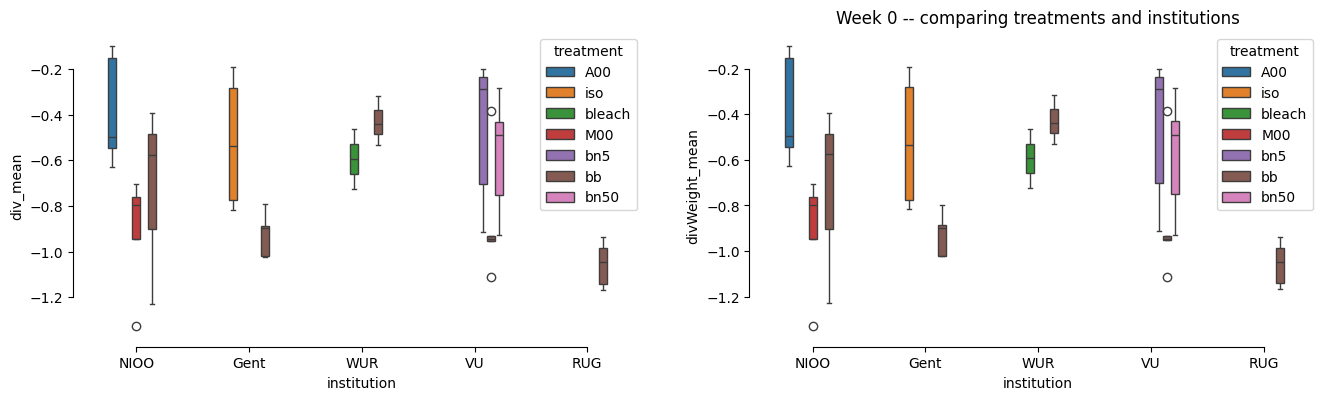

In [63]:
## hypothesis: different treatments start out with different diversity from the start:

fig1, ax1 = plt.subplots(1,2, figsize=(16,4))
plt.title('Week 0 -- comparing treatments and institutions')
sns.boxplot(data=overviewW15, x="institution", y="div_mean", hue="treatment", width=0.5, ax=ax1[0])
#sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
sns.boxplot(data=overviewW15, x="institution", y="divWeight_mean", hue="treatment", width=0.5, ax=ax1[1])

#sns.move_legend(ax1[1], "upper left", bbox_to_anchor=(1, 1))

sns.despine(offset=5, trim=True)


In [64]:
### save the data:
df_shiftRaw.to_pickle(outPath + "PiDiv_df_shiftRaw_singleData_20240724.pkl")
df_shiftRaw.to_csv(outPath + "PiDiv_df_shiftRaw_singleData_20240724.csv", index=False)

df_shiftNorm.to_pickle(outPath + "PiDiv_df_shiftNorm_singleData_20240724.pkl")
df_shiftNorm.to_csv(outPath + "PiDiv_df_shiftNorm_singleData_20240724.csv", index=False)

overview.to_pickle(outPath + "PiDiv_df_overview_singleData_20240724.pkl")
overview.to_csv(outPath + "PiDiv_df_overview_singleData_20240724.csv", index=False)


In [34]:
outPath

'/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/PiDiv_May24/O_output/'